In [2]:
from pathlib import Path
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score
import pandas as pd

import os
import numpy as np
import matplotlib.pyplot as plt
import tqdm.notebook as tqdm


## Data preparation

In [35]:
# Specify folder paths
bbm_root = Path(os.environ['BBM_ROOT'])
data_loc = bbm_root / "data/IO-datasets/TLCN/RESTART/bottom_up"

In [36]:
input_folder = data_loc / "input_arrays"
output_folder = data_loc / "output_arrays"

n_inputs = len(os.listdir(input_folder))
n_outputs = len(os.listdir(output_folder))

# Open the input dataframes
print("Loading input dataframes")
input_files = list(input_folder.iterdir())
inputs = [pd.read_csv(file, index_col=0, header=0) for file in tqdm.tqdm(input_files, total=n_inputs)]

# Open the output dataframes
print("Loading output dataframes")
output_files = list(output_folder.iterdir())
outputs = [pd.read_csv(file, index_col=0, header=[0,1]) for file in tqdm.tqdm(output_folder.iterdir(), total=n_outputs)]

print("Data loaded!")

Loading input dataframes


  0%|          | 0/3607 [00:00<?, ?it/s]

Loading output dataframes


  0%|          | 0/3607 [00:00<?, ?it/s]

Data loaded!


In [37]:
# Convert the dataframes to numpy arrays and concatenate them
X = np.concatenate([df.values for df in tqdm.tqdm(inputs)], axis=0)
Y = np.concatenate([df.values for df in tqdm.tqdm(outputs)], axis=0)

print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

  0%|          | 0/3607 [00:00<?, ?it/s]

  0%|          | 0/3607 [00:00<?, ?it/s]

X shape: (736456, 25)
Y shape: (736456, 6)


In [38]:
# find min and max time duration across all datsets
min_time = np.min([df.index.values[-1] for df in inputs])
max_time = np.max([df.index.values[-1] for df in inputs])

print(f"Min time: {min_time} seconds (in hours: {min_time/3600})")
print(f"Max time: {max_time} seconds (in hours: {max_time/3600})")

Min time: 2700.0 seconds (in hours: 0.75)
Max time: 345600.0 seconds (in hours: 96.0)


## Train-test split and saving the data

In [8]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Save the data to disk for later use
This will ensure that we use the same data for all classifiers.

In [39]:
# Specify paths and save the data
data_folder = bbm_root / "training_datasets/TLCN/RESTART" / "bottom_up"
data_folder.mkdir(parents=True, exist_ok=True) 

X_train_path = data_folder / "X_train.npy"
X_test_path = data_folder / "X_test.npy"
Y_train_path = data_folder / "Y_train.npy"
Y_test_path = data_folder / "Y_test.npy"

In [13]:
np.save(X_train_path, X_train)
np.save(X_test_path, X_test)
np.save(Y_train_path, Y_train)
np.save(Y_test_path, Y_test)

## Train the classifiers

In [40]:
# Load the data
X_train = np.load(X_train_path)
X_test = np.load(X_test_path)
Y_train = np.load(Y_train_path)
Y_test = np.load(Y_test_path)

In [41]:
# Select only the last column, corresponding to the (5,6) pair
Y_train = Y_train[:, -1]
Y_test = Y_test[:, -1]

### Classifier 1

First case. Use AUC-ROC as the evaluation metric.

In [14]:
model_name = "Classifier1"
model = xgb.XGBClassifier(max_depth=5, 
                          n_estimators=3)
model.fit(X_train, Y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [15]:
score_train = roc_auc_score(Y_train, y_pred_train)
score_test = roc_auc_score(Y_test, y_pred_test)

# Confusion matrix for each output
print(f"--- {model_name} (Training) ---")
print(f"Training AUC: {score_train}")
print(f"--- {model_name} (Testing) ---")
print(f"Testing AUC: {score_test}")

# Save the model
model_path = bbm_root / "models/TLCN/classifier1_pair_5_6.json"
model.save_model(model_path)

--- Classifier1 (Training) ---
Training AUC: 0.7741808131243428
--- Classifier1 (Testing) ---
Testing AUC: 0.7407271572908161


### Classifier 2


In [18]:
model_name = "Classifier2"
model = xgb.XGBClassifier(max_depth=10, 
                          n_estimators=3)
model.fit(X_train, Y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [19]:
score_train = roc_auc_score(Y_train, y_pred_train)
score_test = roc_auc_score(Y_test, y_pred_test)

# Confusion matrix for each output
print(f"--- {model_name} (Training) ---")
print(f"Training AUC: {score_train}")
print(f"--- {model_name} (Testing) ---")
print(f"Testing AUC: {score_test}")

# Save the model
model_path = bbm_root / "models/TLCN/classifier2_pair_5_6.json"
model.save_model(model_path)

--- Classifier2 (Training) ---
Training AUC: 0.8689507638857088
--- Classifier2 (Testing) ---
Testing AUC: 0.8333333333333334


### Classifier 3

In [20]:
model_name = "Classifier3"
model = xgb.XGBClassifier(max_depth=5, 
                          n_estimators=8)
model.fit(X_train, Y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [21]:
score_train = roc_auc_score(Y_train, y_pred_train)
score_test = roc_auc_score(Y_test, y_pred_test)

# Confusion matrix for each output
print(f"--- {model_name} (Training) ---")
print(f"Training AUC: {score_train}")
print(f"--- {model_name} (Testing) ---")
print(f"Testing AUC: {score_test}")

# Save the model
model_path = bbm_root / "models/TLCN/classifier3_pair_5_6.json"
model.save_model(model_path)

--- Classifier3 (Training) ---
Training AUC: 0.8689388776404718
--- Classifier3 (Testing) ---
Testing AUC: 0.8425722174177057


### Classifier 4

In [23]:
model_name = "Classifier4"
model = xgb.XGBClassifier(max_depth=10, 
                          n_estimators=8)
model.fit(X_train, Y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [24]:
score_train = roc_auc_score(Y_train, y_pred_train)
score_test = roc_auc_score(Y_test, y_pred_test)

# Confusion matrix for each output
print(f"--- {model_name} (Training) ---")
print(f"Training AUC: {score_train}")
print(f"--- {model_name} (Testing) ---")
print(f"Testing AUC: {score_test}")

# Save the model
model_path = bbm_root / "models/TLCN/classifier4_pair_5_6.json"
model.save_model(model_path)

--- Classifier4 (Training) ---
Training AUC: 0.9032241084165789
--- Classifier4 (Testing) ---
Testing AUC: 0.8333333333333334


### Classifier 5

In [42]:
model_name = "Classifier5"
model = xgb.XGBClassifier(max_depth=5, 
                          n_estimators=80)
model.fit(X_train, Y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [43]:
score_train = roc_auc_score(Y_train, y_pred_train)
score_test = roc_auc_score(Y_test, y_pred_test)

# Confusion matrix for each output
print(f"--- {model_name} (Training) ---")
print(f"Training AUC: {score_train}")
print(f"--- {model_name} (Testing) ---")
print(f"Testing AUC: {score_test}")

--- Classifier5 (Training) ---
Training AUC: 1.0
--- Classifier5 (Testing) ---
Testing AUC: 0.8888753054389643


In [44]:
# Save the model
model_path = bbm_root / "models/TLCN/classifier5_pair_5_6.json"
model.save_model(model_path)

## Confusion matrices for each classifier

In [37]:
# Load the models
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier()
model3 = xgb.XGBClassifier()
model4 = xgb.XGBClassifier()
model5 = xgb.XGBClassifier()

model1.load_model(bbm_root / "models/TLCN/classifier1_pair_5_6.json")
model2.load_model(bbm_root / "models/TLCN/classifier2_pair_5_6.json")
model3.load_model(bbm_root / "models/TLCN/classifier3_pair_5_6.json")
model4.load_model(bbm_root / "models/TLCN/classifier4_pair_5_6.json")
model5.load_model(bbm_root / "models/TLCN/classifier5_pair_5_6.json")

In [38]:
# Predictions
y_pred_train1 = model1.predict(X_train)
y_pred_test1 = model1.predict(X_test)

y_pred_train2 = model2.predict(X_train)
y_pred_test2 = model2.predict(X_test)

y_pred_train3 = model3.predict(X_train)
y_pred_test3 = model3.predict(X_test)

y_pred_train4 = model4.predict(X_train)
y_pred_test4 = model4.predict(X_test)

y_pred_train5 = model5.predict(X_train)
y_pred_test5 = model5.predict(X_test)

In [ ]:
# Confusion matrices
cm_train1 = confusion_matrix(Y_train, y_pred_train1, labels=[0,1])
cm_test1 = confusion_matrix(Y_test, y_pred_test1, labels=[0,1])

cm_train2 = confusion_matrix(Y_train, y_pred_train2, labels=[0,1])
cm_test2 = confusion_matrix(Y_test, y_pred_test2, labels=[0,1])

cm_train3 = confusion_matrix(Y_train, y_pred_train3, labels=[0,1])
cm_test3 = confusion_matrix(Y_test, y_pred_test3, labels=[0,1])

cm_train4 = confusion_matrix(Y_train, y_pred_train4, labels=[0,1])
cm_test4 = confusion_matrix(Y_test, y_pred_test4, labels=[0,1])

cm_train5 = confusion_matrix(Y_train, y_pred_train5, labels=[0,1])
cm_test5 = confusion_matrix(Y_test, y_pred_test5, labels=[0,1])


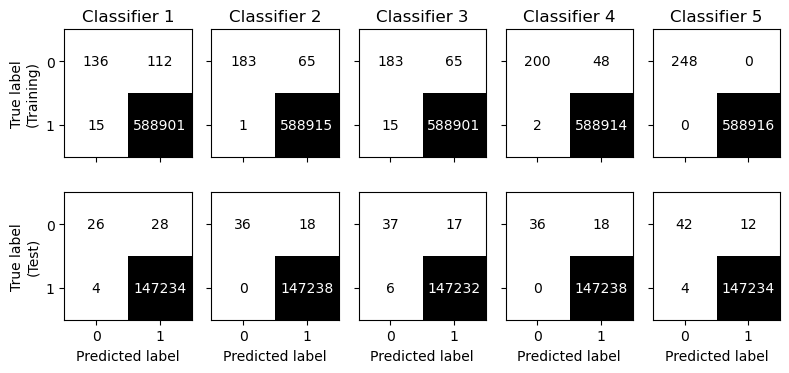

In [56]:
fig, ax = plt.subplots(2, 5, figsize=(8, 4), sharey=True, sharex=True)

ConfusionMatrixDisplay(cm_train1).plot(ax=ax[0, 0], cmap="Greys", colorbar=False)
ConfusionMatrixDisplay(cm_test1).plot(ax=ax[1, 0], cmap="Greys", colorbar=False)
ax[0, 0].set_title("Classifier 1")
ax[0, 0].set_xlabel(None)
ax[1, 0].set_xlabel("Predicted label")
ax[0, 0].set_ylabel("""True label
(Training)""")
ax[1, 0].set_ylabel("""True label
(Test)""")

ConfusionMatrixDisplay(cm_train2).plot(ax=ax[0, 1], cmap="Greys", colorbar=False)
ConfusionMatrixDisplay(cm_test2).plot(ax=ax[1, 1], cmap="Greys", colorbar=False)
ax[0, 1].set_title("Classifier 2")
ax[0, 1].set_xlabel(None)
ax[1, 1].set_xlabel("Predicted label")
ax[0, 1].set_ylabel(None)
ax[1, 1].set_ylabel(None)

ConfusionMatrixDisplay(cm_train3).plot(ax=ax[0, 2], cmap="Greys", colorbar=False)
ConfusionMatrixDisplay(cm_test3).plot(ax=ax[1, 2], cmap="Greys", colorbar=False)
ax[0, 2].set_title("Classifier 3")
ax[0, 2].set_xlabel(None)
ax[1, 2].set_xlabel("Predicted label")
ax[0, 2].set_ylabel(None)
ax[1, 2].set_ylabel(None)

ConfusionMatrixDisplay(cm_train4).plot(ax=ax[0, 3], cmap="Greys", colorbar=False)
ConfusionMatrixDisplay(cm_test4).plot(ax=ax[1, 3], cmap="Greys", colorbar=False)
ax[0, 3].set_title("Classifier 4")
ax[0, 3].set_xlabel(None)
ax[1, 3].set_xlabel("Predicted label")
ax[0, 3].set_ylabel(None)
ax[1, 3].set_ylabel(None)

ConfusionMatrixDisplay(cm_train5).plot(ax=ax[0, 4], cmap="Greys", colorbar=False)
ConfusionMatrixDisplay(cm_test5).plot(ax=ax[1, 4], cmap="Greys", colorbar=False)
ax[0, 4].set_title("Classifier 5")
ax[0, 4].set_xlabel(None)
ax[1, 4].set_xlabel("Predicted label")
ax[0, 4].set_ylabel(None)
ax[1, 4].set_ylabel(None)

plt.tight_layout()

None

## HP tuning using Grid Search

In [9]:
from sklearn.model_selection import GridSearchCV

model_name = "Classifier6"

In [12]:
clf = xgb.XGBClassifier(eval_metric="auc",
                        objective="binary:logistic",
                        device="cuda:0")

# Hyperparameter tuning
param_grid = {
    'n_estimators': [i for i in range(10, 100, 5)],
    'max_depth': list(range(1, 10, 2)),
    'scale_pos_weight': [302 / 50000, 302 / 31885, 1, 2],
    'gamma': np.arange(0, 1., 0.2),
    'max_delta_step': np.arange(0, 5, 1),
}

clf = GridSearchCV(clf,
                   param_grid,
                   cv=5,
                   scoring='roc_auc',
                   n_jobs=-1,
                   verbose=3
                   )

# Train the model
clf.fit(X_train, Y_train, eval_set=[(X_test, Y_test)])

Fitting 5 folds for each of 9000 candidates, totalling 45000 fits
[0]	validation_0-auc:0.90564
[0]	validation_0-auc:0.90577
[0]	validation_0-auc:0.90577
[1]	validation_0-auc:0.91059
[0]	validation_0-auc:0.90564
[1]	validation_0-auc:0.91371
[1]	validation_0-auc:0.91371
[2]	validation_0-auc:0.97298
[1]	validation_0-auc:0.91355
[2]	validation_0-auc:0.91059
[2]	validation_0-auc:0.97298
[2]	validation_0-auc:0.97288
[3]	validation_0-auc:0.98407
[3]	validation_0-auc:0.98351
[3]	validation_0-auc:0.91059
[4]	validation_0-auc:0.98597
[4]	validation_0-auc:0.98841
[3]	validation_0-auc:0.98400
[4]	validation_0-auc:0.91059
[5]	validation_0-auc:0.99032
[5]	validation_0-auc:0.98662
[4]	validation_0-auc:0.98613
[5]	validation_0-auc:0.91059
[6]	validation_0-auc:0.99053
[6]	validation_0-auc:0.99079
[6]	validation_0-auc:0.91059
[5]	validation_0-auc:0.98680
[7]	validation_0-auc:0.99197
[7]	validation_0-auc:0.99288
[7]	validation_0-auc:0.91059
[6]	validation_0-auc:0.99071
[8]	validation_0-auc:0.99455
[8]	va

/home/jpfutalef/miniforge3/envs/phd/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:56:34] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/home/jpfutalef/miniforge3/envs/phd/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:56:34] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the devic

[9]	validation_0-auc:0.99597
[0]	validation_0-auc:0.90904
[1]	validation_0-auc:0.97262
[2]	validation_0-auc:0.97509
[3]	validation_0-auc:0.98580
[0]	validation_0-auc:0.90889
[0]	validation_0-auc:0.90577
[4]	validation_0-auc:0.98580
[5]	validation_0-auc:0.99117
[1]	validation_0-auc:0.90577
[1]	validation_0-auc:0.97229
[0]	validation_0-auc:0.90564
[6]	validation_0-auc:0.99048
[0]	validation_0-auc:0.90918
[1]	validation_0-auc:0.97252
[2]	validation_0-auc:0.90577
[2]	validation_0-auc:0.97229
[0]	validation_0-auc:0.90577
[1]	validation_0-auc:0.97236
[7]	validation_0-auc:0.99278
[2]	validation_0-auc:0.97288
[3]	validation_0-auc:0.90577
[3]	validation_0-auc:0.98326
[2]	validation_0-auc:0.97299
[0]	validation_0-auc:0.90577
[8]	validation_0-auc:0.99383
[1]	validation_0-auc:0.91369
[3]	validation_0-auc:0.98344
[4]	validation_0-auc:0.90577
[3]	validation_0-auc:0.98407
[4]	validation_0-auc:0.98779
[1]	validation_0-auc:0.91373
[9]	validation_0-auc:0.99571
[5]	validation_0-auc:0.90577
[4]	validation

/home/jpfutalef/miniforge3/envs/phd/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:56:35] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


[8]	validation_0-auc:0.99457
[6]	validation_0-auc:0.99075
[6]	validation_0-auc:0.99060
[3]	validation_0-auc:0.98341
[9]	validation_0-auc:0.99529
[8]	validation_0-auc:0.99368
[9]	validation_0-auc:0.99577
[7]	validation_0-auc:0.99290
[4]	validation_0-auc:0.98549
[9]	validation_0-auc:0.99568
[7]	validation_0-auc:0.99292
[5]	validation_0-auc:0.98749
[8]	validation_0-auc:0.99521
[8]	validation_0-auc:0.99518
[6]	validation_0-auc:0.99237
[9]	validation_0-auc:0.99611
[9]	validation_0-auc:0.99603
[7]	validation_0-auc:0.99339
[8]	validation_0-auc:0.99474
[9]	validation_0-auc:0.99645


/home/jpfutalef/miniforge3/envs/phd/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:56:35] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/home/jpfutalef/miniforge3/envs/phd/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [23:56:35] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the devic

[CV 2/5] END gamma=0.0, max_delta_step=0, max_depth=1, n_estimators=10, scale_pos_weight=0.00604;, score=0.996 total time=   4.4s
[0]	validation_0-auc:0.87696
[CV 1/5] END gamma=0.0, max_delta_step=0, max_depth=1, n_estimators=10, scale_pos_weight=1;, score=0.929 total time=   4.4s
[0]	validation_0-auc:0.90577
[1]	validation_0-auc:0.87696
[1]	validation_0-auc:0.90577
[2]	validation_0-auc:0.87696
[2]	validation_0-auc:0.90577
[3]	validation_0-auc:0.90577
[3]	validation_0-auc:0.87696
[4]	validation_0-auc:0.90577
[4]	validation_0-auc:0.87696
[5]	validation_0-auc:0.90577
[5]	validation_0-auc:0.91075
[6]	validation_0-auc:0.90577
[6]	validation_0-auc:0.91075
[7]	validation_0-auc:0.90577
[7]	validation_0-auc:0.91075
[8]	validation_0-auc:0.91369
[9]	validation_0-auc:0.91369
[8]	validation_0-auc:0.91871
[9]	validation_0-auc:0.91871
[CV 1/5] END gamma=0.0, max_delta_step=0, max_depth=1, n_estimators=10, scale_pos_weight=0.009471538340912656;, score=0.997 total time=   4.5s
[0]	validation_0-auc:0.

Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x7f77f7d65db0>>
Traceback (most recent call last):
  File "/home/jpfutalef/miniforge3/envs/phd/lib/python3.10/site-packages/xgboost/core.py", line 637, in _next_wrapper
    return self._handle_exception(lambda: self.next(input_data), 0)
  File "/home/jpfutalef/miniforge3/envs/phd/lib/python3.10/site-packages/xgboost/core.py", line 550, in _handle_exception
    return fn()
  File "/home/jpfutalef/miniforge3/envs/phd/lib/python3.10/site-packages/xgboost/core.py", line 637, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
  File "/home/jpfutalef/miniforge3/envs/phd/lib/python3.10/site-packages/xgboost/data.py", line 1416, in next
    input_data(**self.kwargs)
  File "/home/jpfutalef/miniforge3/envs/phd/lib/python3.10/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/home/jpfutale

KeyboardInterrupt: 

In [13]:
# Get the best model
model = clf.best_estimator_

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

score_train = roc_auc_score(Y_train, y_pred_train)
score_test = roc_auc_score(Y_test, y_pred_test)

# Confusion matrix for each output
print(f"--- {model_name} (Training) ---")
print(f"Training AUC: {score_train}")
print(f"--- {model_name} (Testing) ---")
print(f"Testing AUC: {score_test}")

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [11]:
# Print the best parameters
print(clf.best_params_)

{'max_depth': 3, 'n_estimators': 80}


In [27]:
# Save the model
model_path = bbm_root / "models/TLCN/classifier6_pair_5_6.json"
model.save_model(model_path)

XGBoostError: [14:04:59] /workspace/src/learner.cc:764: Check failed: mparam_.num_feature != 0 (0 vs. 0) : 0 feature is supplied.  Are you using raw Booster interface?
Stack trace:
  [bt] (0) /home/jpfutalef/miniforge3/envs/phd/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x22dbbc) [0x7f4c1ce2dbbc]
  [bt] (1) /home/jpfutalef/miniforge3/envs/phd/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x5c2490) [0x7f4c1d1c2490]
  [bt] (2) /home/jpfutalef/miniforge3/envs/phd/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x5c906c) [0x7f4c1d1c906c]
  [bt] (3) /home/jpfutalef/miniforge3/envs/phd/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(XGBoosterSaveModel+0x63) [0x7f4c1cd37983]
  [bt] (4) /home/jpfutalef/miniforge3/envs/phd/lib/python3.10/lib-dynload/../../libffi.so.8(+0x6a4a) [0x7f4d79f6ca4a]
  [bt] (5) /home/jpfutalef/miniforge3/envs/phd/lib/python3.10/lib-dynload/../../libffi.so.8(+0x5fea) [0x7f4d79f6bfea]
  [bt] (6) /home/jpfutalef/miniforge3/envs/phd/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x91c7) [0x7f4d79f7b1c7]
  [bt] (7) /home/jpfutalef/miniforge3/envs/phd/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0x867b) [0x7f4d79f7a67b]
  [bt] (8) /home/jpfutalef/miniforge3/envs/phd/bin/python(_PyObject_MakeTpCall+0x26b) [0x563e1db6fcdb]



# Time efficiency comparison

In [67]:
from importlib import reload
from greyboxmodels.modelbuild.Plant import Plant
from greyboxmodels.models.cyber import TLCNetwork
import time

reload(TLCNetwork)

<module 'greyboxmodels.cpsmodels.cyber.TLCN.TLCNetwork' from '/mnt/d/projects/Hierarchical_CPS_models/src/greyboxmodels/cpsmodels/cyber/TLCN/TLCNetwork.py'>

In [68]:
# The TLCN path
wbm_root = Path(os.environ['MODELS_ROOT'])
tlcn_wbm_path = (wbm_root / "data/wbm-models/tlcn_case7_wbm.pkl").resolve()
print(tlcn_wbm_path)

# Load the TLCN model
tlcn_wbm = Plant.load(tlcn_wbm_path)

/mnt/d/projects/Hierarchical_CPS_models/data/wbm-models/tlcn_case7_wbm.pkl


In [78]:
# Obtain the outputs using the TLCN model
od_pair = (5,6)
computed_Y = []

# timer
wbm_times = []

for x in tqdm.tqdm(X):
    # Timer
    start = time.time()
    
    # Update model's condition
    tlcn_wbm.update_condition(None, x, None)
    
    # Get the TLCN realization
    result = tlcn_wbm.connect_node_pair(od_pair[0], od_pair[1])
    
    # Store "success" result as an integer
    computed_Y.append(1 if result["success"] else 0)
    
    # timer end
    end = time.time()
    wbm_times.append(end - start)

  0%|          | 0/736456 [00:00<?, ?it/s]

In [48]:
# Repeat using the optimized classifier
model = xgb.XGBClassifier()
model.load_model(bbm_root / "models/TLCN/classifier5_pair_5_6.json")

# Timer
start = time.time()

# Predict
predicted_Y = model.predict(X)

# timer end
end = time.time()

bbm_time = end - start
print(f"BBM time: {bbm_time}")

    

BBM time: 0.2078843116760254


In [99]:
# Verify that computed and real outputs are the same
np.allclose(computed_Y[0:100000], Y.astype(int)[0:100000, -1])


False

In [100]:
# Find where the outputs differ
diff = computed_Y - Y.astype(int)[:, -1]
diff_indices = np.where(diff != 0)
print(diff_indices)

(array([ 32911,  32913,  32914,  32916,  33823,  33824,  33825,  34028,
        34030,  34031,  34033,  34130,  34132,  34133,  34135,  34249,
        34251,  34252,  34254,  34352,  34354,  34355,  34357,  34475,
        34477,  34478,  34480,  34671,  34673,  34674,  34676,  34789,
        34791,  34792,  34794,  34905,  34907,  34908,  34910,  35023,
        35025,  35026,  35028, 108593, 108595, 108611, 120382, 120610,
       131716, 131717, 131720, 132837, 132838, 132841, 133004, 133005,
       133008, 133171, 133172, 133175, 139683, 143310, 144147, 144343,
       144539, 158010, 158011, 158012, 158015, 158016, 158019, 158030,
       158035, 269104, 306954, 307317, 307318, 307922, 307923, 314114,
       314118, 314120, 414781, 416205, 416568, 416930, 429288, 461767,
       571679, 573008, 611520, 611528, 611529, 613327, 613335, 613336,
       613597, 613605, 613606, 613867, 613875, 613876, 614137, 614145,
       614146, 614423, 614431, 614432, 614714, 614722, 614723, 615000,
     

In [101]:
xx = X[32911,:]
tlcn_wbm.update_condition(None, xx, None)


array([0.02775358, 0.0155207 , 0.02637019, 0.02460316, 0.02554515,
       0.02997122, 0.02529715, 0.02946204, 0.02943186, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [102]:
rr = tlcn_wbm.connect_node_pair(5, 6)
rr["success"]

np.True_

In [103]:
if rr["success"]:
    print("yes")

yes


In [105]:
computed_Y[32911]

1

In [109]:
Y[32909, -1]

np.int64(0)

In [111]:
# Count the zeros in computed_Y
computed_Y.count(0)

287

In [113]:
# Compute time reductions
wbm_time = (180 + 26) # seconds
bbm_time = bbm_time # milliseconds

time_reduction = (wbm_time - bbm_time) / wbm_time

print(f"Time reduction: {time_reduction}")

Time reduction: 0.0010091471440583756


In [119]:
# Acceleration percentage provided by the bbm
acceleration = (1 / time_reduction)

print(f"Acceleration: {acceleration}")


Acceleration: 990.9357677795236


In [115]:
bbm_time * acceleration

206.0

In [116]:
180+26

206